## Practicing Implicit Method to solve 1D heat equation (unsteady)

In [105]:
import numpy as np
import matplotlib.pyplot as plt

## Setting up the constants

In [106]:
T1 = 200
Tmax = -10
numX = 101 # Mesh points
x = np.linspace(0,1,numX)
y = np.ones(x.shape)*T1

y[0] = T1 # Boundary condition
y[-1] = Tmax
alpha = 0.2
deltaT = 0.1
deltaX = 1.0/(numX-1)
K = (alpha*deltaT)/(deltaX)**2

time = 0
time_max = 10
count = 0

## Setting up the matrix

In [107]:
td = []
td = np.empty(shape=(numX-2, numX-2))
td.fill(0)

for k in range(0,numX-2):
    td[k][k] = 1+2*K
    if k+1 <= numX-3:
        td[k][k+1] = -K
    if k-1 >= 0:
        td[k][k-1] = -K
rhs = np.zeros(shape=(numX-2,1))

## We iterate through time

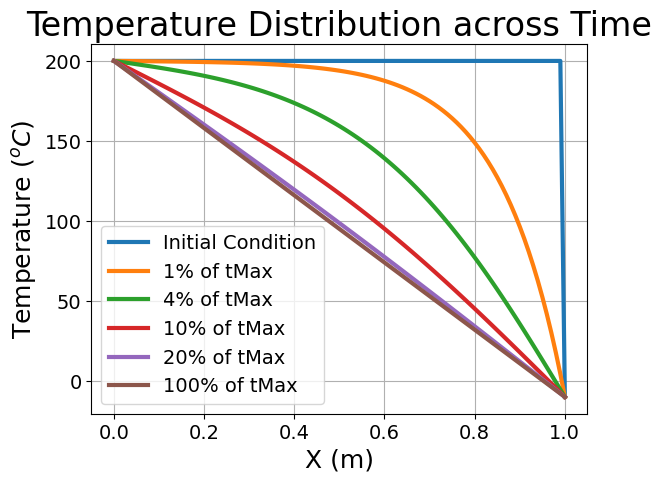

In [108]:
plt.plot(x,y,'-', label='Initial Condition',linewidth=3)
numTimeSteps = (np.rint(time_max/deltaT)).astype(int)
pausePercentages = np.array([1,4,10,20,100])
pauseTimeSteps = np.rint(numTimeSteps*0.01*pausePercentages).astype(int)

while time < time_max:
    yold = np.copy(y)
    rhs = yold[1:-1]
    rhs[0] = rhs[0]+K*yold[0]
    rhs[-1] = rhs[-1]+K*yold[-1]
    # y[1:-1] = (np.linalg.inv(td).dot(np.array([rhs]).T)).T
    y[1:-1] = (np.linalg.solve(td, rhs))

    time = time + deltaT
    count = count + 1
    if count in pauseTimeSteps:
        index = np.where(pauseTimeSteps == count)
        plt.plot(x,y,'-', label='%s%% of tMax' %pausePercentages[index][0],linewidth=3)
        numTimeSteps = (np.rint(time_max/deltaT)).astype(int)
        pausePercentages = np.array([1,4,10,20,100])
        pauseTimeSteps = np.rint(numTimeSteps*0.01*pausePercentages).astype(int)
        
plt.title('Temperature Distribution across Time', fontsize=24)
# plt.xlim(0,1)
plt.xticks(fontsize=14)
# plt.ylim(T1,Tmax)
plt.yticks(fontsize=14)
plt.grid()
plt.ylabel('Temperature ($^{o}C$)', fontsize=18, loc='center',rotation=90)
plt.xlabel('X (m)', fontsize=18)
plt.legend(prop={'size': 14})
plt.show(block=True)

## Plotting